# OpenCV Filters Webcam

In this notebook, several filters will be applied to webcam images.

Those input sources and applied filters will then be displayed either directly in the notebook or on Display Port output.

To run all cells in this notebook a webcam and Display Port monitor are required.

## 1. Start Display Port output 

In [1]:
from pynq.lib.video import *
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
displayport = DisplayPort()

displayport.configure(Mode, PIXEL_RGB)

## 2. Applying OpenCV filters on Webcam input
### Step 1: Specify webcam resolution

In [2]:
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

### Step 2: Initialize camera from OpenCV

In [3]:
import cv2

videoIn = cv2.VideoCapture(0 + cv2.CAP_V4L2)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);
print("capture device is open: " + str(videoIn.isOpened()))

capture device is open: True


### Step 3: Send webcam input to Display Port output

In [4]:
import numpy as np

ret, frame_vga = videoIn.read()

if (ret):
    outframe = displayport.newframe()
    outframe[:] = frame_vga
    displayport.writeframe(outframe)
else:
    raise RuntimeError("Error while reading from camera.")

### Step 4: Edge detection 
Detecting edges on webcam input and display on Display Port.

In [5]:
import time

num_frames = 60
readError = 0

start = time.time()
for i in range (num_frames):   
    # read next image
    ret, frame_vga = videoIn.read()
    if (ret):
        outframe = displayport.newframe()
        laplacian_frame = cv2.Laplacian(frame_vga, cv2.CV_8U, dst=outframe)
        displayport.writeframe(outframe)
    else:
        readError += 1
end = time.time()

print("Frames per second: " + str((num_frames-readError) / (end - start)))
print("Number of read errors: " + str(readError))

Frames per second: 24.455515983802066
Number of read errors: 0


### Step 5: Canny edge detection
Detecting edges on webcam input and display on Display Port.

Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. As the canny algorithm produces only one channel, we need to copy the edges to all three channels.

In [6]:
num_frames = 60

start = time.time()
for i in range (num_frames):
    # read next image
    ret, frame_webcam = videoIn.read()
    if (ret):
        outframe = displayport.newframe()
        edgeframe = np.zeros((480,640)).astype(np.uint8)
        cv2.Canny(frame_webcam, 100, 110, edges=edgeframe)
        outframe[:,:,0] = edgeframe
        outframe[:,:,1] = edgeframe
        outframe[:,:,2] = edgeframe
        displayport.writeframe(outframe)
    else:
        readError += 1
end = time.time()

print("Frames per second: " + str((num_frames-readError) / (end - start)))
print("Number of read errors: " + str(readError))

Frames per second: 25.14621749421976
Number of read errors: 0


### Step 6: Show results
Now use matplotlib to show filtered webcam input inside notebook.

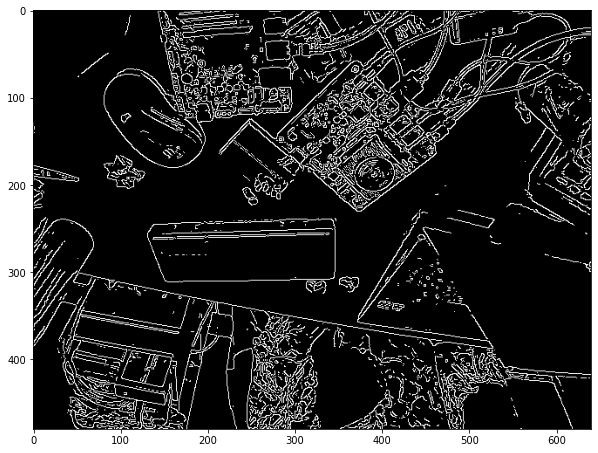

In [7]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

frame_canny = cv2.Canny(frame_webcam, 100, 110)
plt.figure(1, figsize=(10, 10))
frame_vga = np.zeros((480,640,3)).astype(np.uint8)
frame_vga[:,:,0] = frame_canny
frame_vga[:,:,1] = frame_canny
frame_vga[:,:,2] = frame_canny
plt.imshow(frame_vga)
plt.show()

### Step 7: Release camera and Display Port

In [8]:
videoIn.release()
displayport.stop()

----
Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause
